# Linear Regression

### How to run the code

You could download this notebook and the dataset from: https://github.com/diellor/machine-learning/tree/main/liner_regression_car_price_prediction, and you should install all the required packages before running the code locally. 

On how to implement machine learning algortihms from scratch without using any ml related library: https://github.com/diellor/machine-learning

## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import plotly.express as px

## File Setup

In [33]:
xlsx_file = '/Users/hamell/Downloads/dataset/PTs_500_4k_blinded.xlsx'
csv_file = '/Users/hamell/Downloads/dataset/dataset.csv'
data = pd.read_excel(xlsx_file)
data.to_csv(csv_file, index=False)
data = pd.read_csv(csv_file) # read the data from csv file that you have locally.
data.head()

,ID,PT500,PT4000
0,smwp1_0001,25.0,72.5
1,smwp1_0002,5.0,10.0
2,smwp1_0003,5.0,45.0
3,smwp1_0004,5.0,15.0
4,smwp1_0005,2.5,62.5


In [22]:
import os
import nibabel as nib

# Path to the folder containing NIfTI images
folder_path = '/Users/hamell/Downloads/dataset/n171_smwp1'

# List all files in the folder
files = os.listdir(folder_path)

# Iterate over each file in the folder
for file in files:
    if file.endswith('.nii') or file.endswith('.nii.gz'):
        file_path = os.path.join(folder_path, file)

        # Load NIfTI image
        img = nib.load(file_path)

        # Access image data
        data2 = img.get_fdata()

In [23]:
# prompt: create a dataframe of nii file paths in a sorted form

import os

# Path to the folder containing NIfTI images
folder_path = '/Users/hamell/Downloads/dataset/n171_smwp1'

# Get a list of all NIfTI files in the folder
nii_files = [f for f in os.listdir(folder_path) if f.endswith('.nii') or f.endswith('.nii.gz')]

# Create a DataFrame with the file paths
df = pd.DataFrame({'file_path': nii_files})

# Sort the DataFrame by file name
df = df.sort_values('file_path')

# Print the sorted DataFrame
print(df)


            file_path
98   smwp10001_T1.nii
24   smwp10002_T1.nii
127  smwp10003_T1.nii
82   smwp10004_T1.nii
157  smwp10005_T1.nii
..                ...
81   smwp10167_T1.nii
139  smwp10168_T1.nii
58   smwp10169_T1.nii
104  smwp10170_T1.nii
5    smwp10171_T1.nii

[171 rows x 1 columns]


In [24]:
len(df)

171

In [25]:
# prompt: store these above mages in the form of an array
import numpy as np
# Create an empty list to store the images
images = []

# Iterate over each file in the folder
for file in files:
    if file.endswith('.nii') or file.endswith('.nii.gz'):
        file_path = os.path.join(folder_path, file)

        # Load NIfTI image
        img = nib.load(file_path)

        # Access image data
        data2 = img.get_fdata()

        # Append the image data to the list
        images.append(data2)

# Convert the list of images to a NumPy array
images_array = np.array(images)

In [26]:
print(images_array[0].shape)

(113, 137, 113)


In [27]:
# prompt: downsample images in images_array

# Downsample the images using a factor of 2 in each dimension
downsampled_images = []
for image in images_array:
    downsampled_image = image[::4, ::5, ::4]
    downsampled_images.append(downsampled_image)

# Convert the list of downsampled images to a NumPy array
downsampled_images_array = np.array(downsampled_images)

print(downsampled_images_array[0].shape)


(29, 28, 29)


In [28]:
# prompt: flatten each image

flattened_images = []
for image in downsampled_images_array:
    flattened_image = image.flatten()
    flattened_images.append(flattened_image)

flattened_images_array = np.array(flattened_images)


In [29]:
# prompt: give vector of length of flattened images

flattened_lengths = [len(image) for image in flattened_images]


In [30]:
# prompt: normalize above images

# Normalize the flattened images
normalized_images = []
for image in flattened_images:
    normalized_image = image/255
    normalized_images.append(normalized_image)

# Convert the list of normalized images to a NumPy array
normalized_images_array = np.array(normalized_images)


## Exploratory Analysis and Visualization

In order to understand the data that's available, we must perform data analysis by vizualizing the distribution of values in each feature, and the relationships between selling price and other features. By features I mean the columns of the data.

In [34]:
data

,ID,PT500,PT4000
0,smwp1_0001,25.0,72.5
1,smwp1_0002,5.0,10.0
2,smwp1_0003,5.0,45.0
3,smwp1_0004,5.0,15.0
4,smwp1_0005,2.5,62.5
...,...,...,...
166,smwp1_0167,0.0,27.5
167,smwp1_0168,37.5,2.5
168,smwp1_0169,7.5,10.0
169,smwp1_0170,0.0,-2.5


Explore some statistics for the numerical columns:

In [35]:
data.describe()

,PT500,PT4000
count,171.000000,171.000000
mean,11.630117,30.921053
std,9.509181,21.789256
min,-5.000000,-2.500000
25%,5.000000,12.500000
50%,10.000000,27.500000
75%,17.500000,50.000000
max,50.000000,82.500000


## Analysis of Numerical Features

### PT500

In [36]:
fig = px.histogram(data, 
                   x='PT500', 
                   marginal='box', 
                   nbins=16, 
                   title='Distribution of PT500')
fig.update_layout(bargap=0.1)
fig.show()

### PT4000

In [37]:
fig = px.histogram(data, 
                   x='PT4000', 
                   marginal='box', 
                   nbins=16, 
                   title='Distribution of PT4000')
fig.update_layout(bargap=0.1)
fig.show()

## Correlation

In [38]:
data.PT500.corr(data.PT4000)

0.45067744434025386

You can use the .corr() method to show the correlation coefficients between all pairs of numerical columns.

In [39]:
data.select_dtypes(include=['int', 'float']).corr()

,PT500,PT4000
PT500,1.000000,0.450677
PT4000,0.450677,1.000000


The table above is usually visualized using a heatmap.

Text(0.5, 1.0, 'Correlation Matrix')

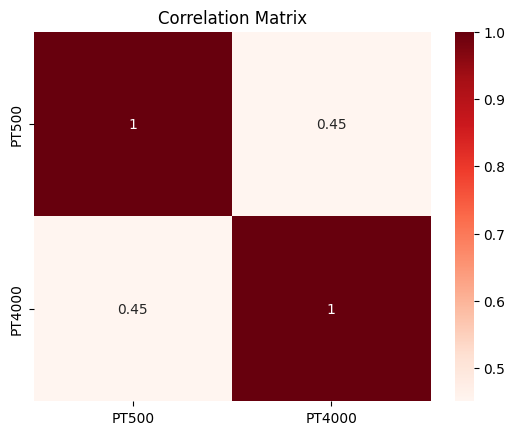

In [40]:
sns.heatmap(data.select_dtypes(include=['int', 'float']).corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

## PT500 Model

## Training, Validation and Test Sets

## One-Hot Encoding - Converting Categorical Data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(normalized_images_array,data['PT500'],test_size=0.3, random_state=42)

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Training the model and making predictions on the test (unseen) data while training. (Which in real-world scenario would be the new data that you have and want to make predictions on)

## Training the model

MAE:  9.296505225728197
MSE:  132.82477230776587
MSE on training data:  1.4279045292824029e-27
R2 score:  -4.26911857324672


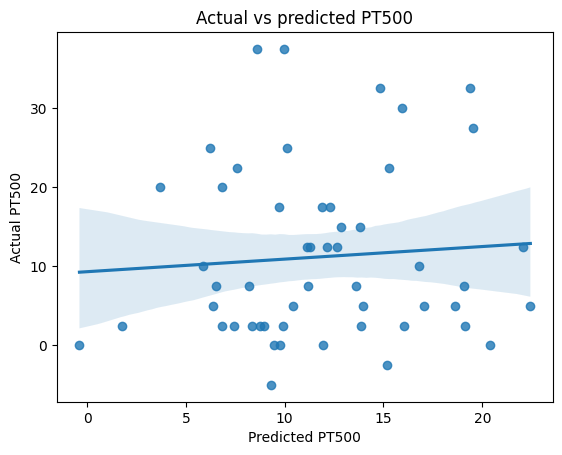

In [64]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

pred_train = model.predict(X_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("MSE on training data: ", (metrics.mean_squared_error(pred_train, y_train)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted PT500")
plt.ylabel('Actual PT500')
plt.title("Actual vs predicted PT500")
plt.show()

Note: You can find my linear regression implementation FROM SCRATCH without using sklearn library here: 

In order to get more in depth understanding of the topic, it's important to further research all the topics presented in this document. Some useful lecture on Linear Regression and Gradient Decent can be found here:

https://www.youtube.com/watch?v=4b4MUYve_U8&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=2

Some useful books on Machine Learning and Deep Learning:
* Deep Learning - Ian Goodfellow Yoshua Bengio Aaron Courville
* Christopher M. Bishop - Pattern Recognition and Machine Learning
* Charu C. Aggarwal - Data Mining The Textbook


## PT4000 Model

## Training, Validation and Test Sets

## One-Hot Encoding - Converting Categorical Data

In [65]:
X_train, X_test, y_train, y_test = train_test_split(normalized_images_array,data['PT4000'],test_size=0.3, random_state=42)

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Training the model

MAE:  19.778166188999585
MSE:  534.8728664647085
MSE on training data:  2.3573444252637412e-26
R2 score:  -2.8849587023102314


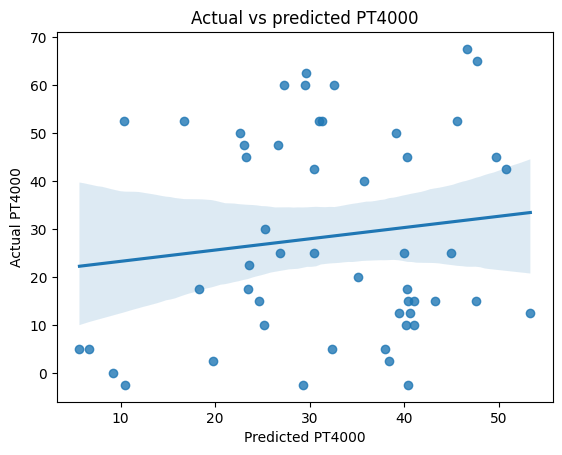

In [67]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

pred_train = model.predict(X_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("MSE on training data: ", (metrics.mean_squared_error(pred_train, y_train)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted PT4000")
plt.ylabel('Actual PT4000')
plt.title("Actual vs predicted PT4000")
plt.show()